In [26]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import scipy.stats as ss

from sklearn.model_selection import cross_validate

In [27]:
dataset_path_airbnb = os.path.join('../../datasets/Airbnb_price/')
file_name_airbnb = 'data_Airbnb_preprocessed.csv'
df_airbnb = pd.read_csv(dataset_path_airbnb + file_name_airbnb)

X_airbnb = df_airbnb.drop(['log_price'], axis = 1)
y_airbnb = df_airbnb['log_price']

<AxesSubplot: >

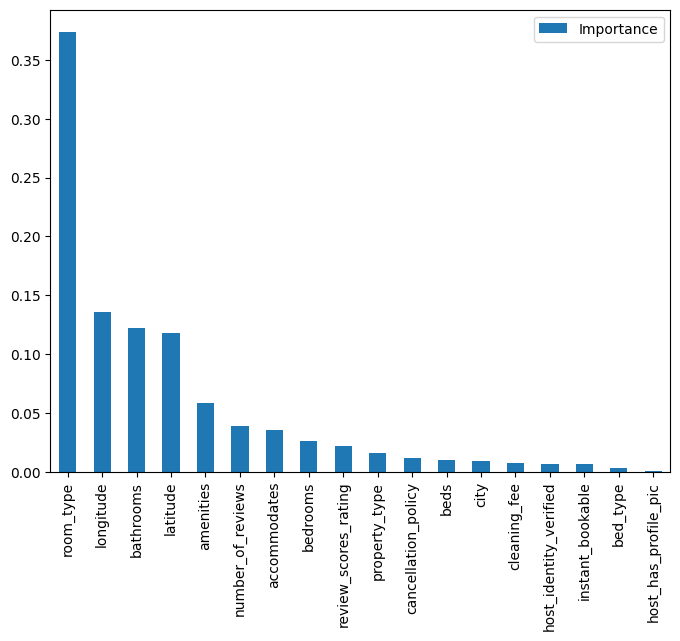

In [28]:
clf = RandomForestRegressor(random_state =  42, n_jobs=-1)
# Train model
model = clf.fit(X_airbnb, y_airbnb)

feat_importances = pd.DataFrame(model.feature_importances_, index = X_airbnb.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

<AxesSubplot: >

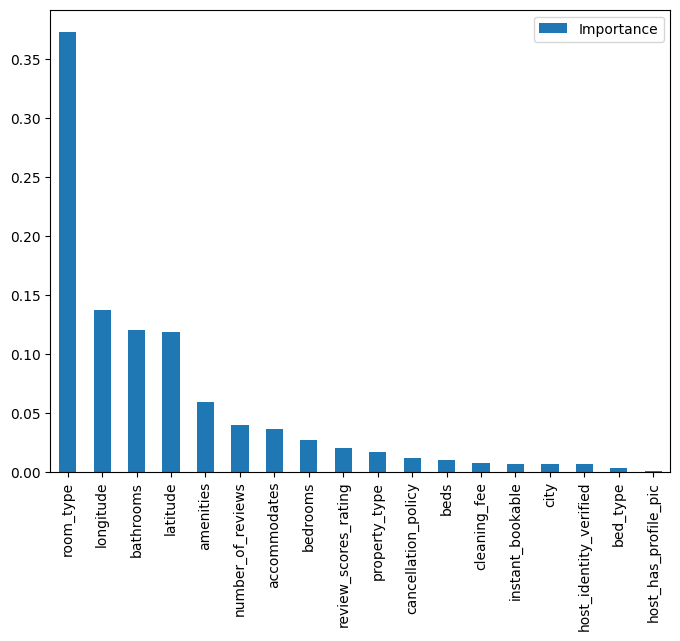

In [30]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state =  42)
# Train model
model = dtr.fit(X_airbnb, y_airbnb)

feat_importances = pd.DataFrame(model.feature_importances_, index = X_airbnb.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

In [31]:
output = cross_validate(clf, X_airbnb, y_airbnb, cv=2, scoring = 'accuracy', return_estimator =True)

for idx,estimator in enumerate(output['estimator']):
    print("Features sorted by their score for estimator {}:".format(idx))
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index = X_airbnb.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
    print(feature_importances)



d:\ITU\CalculusandStatistics\KDS_Statistics_GroupProject\venv\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\ITU\CalculusandStatistics\KDS_Statistics_GroupProject\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "d:\ITU\CalculusandStatistics\KDS_Statistics_GroupProject\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "d:\ITU\CalculusandStatistics\KDS_Statistics_GroupProject\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "d:\ITU\CalculusandStatistics\KDS_Statistics_GroupProject\venv\lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    ret

Features sorted by their score for estimator 0:
                        importance
room_type                 0.370186
longitude                 0.131402
bathrooms                 0.125166
latitude                  0.116445
amenities                 0.060389
number_of_reviews         0.038382
accommodates              0.036952
bedrooms                  0.023957
review_scores_rating      0.023848
property_type             0.015634
city                      0.011657
cancellation_policy       0.011281
beds                      0.009940
cleaning_fee              0.007781
instant_bookable          0.006609
host_identity_verified    0.006557
bed_type                  0.002810
host_has_profile_pic      0.001006
Features sorted by their score for estimator 1:
                        importance
room_type                 0.379112
longitude                 0.135182
bathrooms                 0.119075
latitude                  0.114379
amenities                 0.056653
number_of_reviews         0.0

d:\ITU\CalculusandStatistics\KDS_Statistics_GroupProject\venv\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\ITU\CalculusandStatistics\KDS_Statistics_GroupProject\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "d:\ITU\CalculusandStatistics\KDS_Statistics_GroupProject\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "d:\ITU\CalculusandStatistics\KDS_Statistics_GroupProject\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "d:\ITU\CalculusandStatistics\KDS_Statistics_GroupProject\venv\lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    ret